Use https://www.gradio.app/ to present this output

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
data_dict = pd.read_excel("/Users/ashapondicherry/Desktop/Cross Road Analytics Competition/Colts Ticketing Data Dictionary.xlsx")
colts_data = pd.read_csv("/Users/ashapondicherry/Desktop/Cross Road Analytics Competition/Cross Road Analytics Competition Dataset.csv", sep = ",", header=0, encoding = "utf-8")
colts_data


/var/folders/hv/t48xy_252t7633xlnzl9z7540000gn/T/ipykernel_61140/3526024405.py:2: DtypeWarning: Columns (0,30) have mixed types. Specify dtype option on import or set low_memory=False.
  colts_data = pd.read_csv("/Users/ashapondicherry/Desktop/Cross Road Analytics Competition/Cross Road Analytics Competition Dataset.csv", sep = ",", header=0, encoding = "utf-8")


,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,...,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,...,101-10-1,2021,NaN,25.0,CLT21HOU-101-10-1,Yes,NaN,NaN,NaN,NaN
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,...,101-10-10,2021,NaN,20.0,CLT21HOU-101-10-10,No,NaN,NaN,NaN,NaN
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,...,101-10-11,2021,NaN,20.0,CLT21HOU-101-10-11,No,NaN,NaN,NaN,NaN
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,...,101-10-12,2021,NaN,4.0,CLT21HOU-101-10-12,Yes,NaN,NaN,NaN,NaN
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,...,101-10-13,2021,NaN,32.0,CLT21HOU-101-10-13,No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286911,1831131890,Season,CLT22WAS,2022-10-30,22FS,Not Comp,646,9,5,RN,...,646-9-5,2022,NaN,0.0,CLT22WAS-646-9-5,No,Yes,50.0,2022-09-11 00:00:00,1.0
1286912,1831131890,Season,CLT22WAS,2022-10-30,22FS,Not Comp,646,9,6,RN,...,646-9-6,2022,NaN,0.0,CLT22WAS-646-9-6,Yes,NaN,NaN,NaN,1.0
1286913,1246180690,Sponsor,CLT22WAS,2022-10-30,22FS8,Not Comp,646,9,7,RR,...,646-9-7,2022,NaN,8.0,CLT22WAS-646-9-7,Yes,NaN,NaN,NaN,NaN
1286914,1246180690,Sponsor,CLT22WAS,2022-10-30,22FS8,Not Comp,646,9,8,RR,...,646-9-8,2022,NaN,8.0,CLT22WAS-646-9-8,Yes,NaN,NaN,NaN,NaN


In [193]:
colts_data.columns

Index(['acct_id', 'acct_type_desc', 'event_name', 'event_date',
       'plan_event_name', 'comp_name', 'section_name', 'row_name', 'SeatNum',
       'price_code', 'PC1', 'Price', 'paid', 'add_datetime', 'class_name',
       'status', 'Sales_Source', 'isHost', 'SeatType', 'TicketClass',
       'Start Year', 'LastYear', 'Term', 'TicketType', 'SeatUniqueID',
       'Season', 'ClubExpYear', 'Tenure', 'UniqueID', 'isAttended', 'Resold',
       'ResalePrice', 'ResaleDate', 'isSTM'],
      dtype='object')

In [194]:
# change date to numeric - categorical int
# week number of the game 
# opponent to a numeric
# light gbm - binary classifier with categorical features


In [195]:
print(sorted(colts_data.event_date.unique()))

['2021-08-15', '2021-09-12', '2021-09-19', '2021-10-17', '2021-10-31', '2021-11-04', '2021-11-14', '2021-11-28', '2021-12-18', '2022-01-02', '2022-08-20', '2022-08-27', '2022-09-25', '2022-10-02', '2022-10-16', '2022-10-30', '2022-11-20', '2022-11-28', '2022-12-26', '2023-01-08']


In [196]:
def which_season(check_date):
    if check_date in ['2021-08-15','2022-08-20','2022-08-27']:
        return "pre_season"
    else:
        return "regular_season"


Created a derived column - season_type which differentiate pre-season and regular season games

In [197]:
colts_data['season_type'] = colts_data.event_date.apply(which_season)


In [198]:
colts_data.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,...,Season,ClubExpYear,Tenure,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM,season_type
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,...,2021,NaN,25.0,CLT21HOU-101-10-1,Yes,NaN,NaN,NaN,NaN,regular_season
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,...,2021,NaN,20.0,CLT21HOU-101-10-10,No,NaN,NaN,NaN,NaN,regular_season
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,...,2021,NaN,20.0,CLT21HOU-101-10-11,No,NaN,NaN,NaN,NaN,regular_season
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,...,2021,NaN,4.0,CLT21HOU-101-10-12,Yes,NaN,NaN,NaN,NaN,regular_season
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,...,2021,NaN,32.0,CLT21HOU-101-10-13,No,NaN,NaN,NaN,NaN,regular_season


In [199]:
colts_data.season_type.value_counts()

regular_season    1093878
pre_season         193038
Name: season_type, dtype: int64

In [200]:
colts_data.event_name.unique()

array(['CLT21HOU', 'CLT21JAX', 'CLT21LAR', 'CLT21LV', 'CLT21NE',
       'CLT21NYJ', 'CLT21PRE', 'CLT21SEA', 'CLT21TB', 'CLT21TEN',
       'CLT22HOU', 'CLT22JAX', 'CLT22KC', 'CLT22LAC', 'CLT22PHI',
       'CLT22PIT', 'CLT22PR1', 'CLT22PR2', 'CLT22TEN', 'CLT22WAS'],
      dtype=object)

In [201]:
min(colts_data['event_date'])

'2021-08-15'

In [202]:
# column_check = data_.columns


# for i in column_check:
#     print("*" * 50)
#     print(" " * 5 + i)
#     print(data_[i].value_counts(dropna=False))
#     print("*" * 50)
#     print("\n")

In [203]:
elo_scores = pd.read_csv("/Users/ashapondicherry/Desktop/Cross Road Analytics Competition/nfl-elo/nfl_elo.csv", sep = ",", header=0, encoding = "utf-8")


In [204]:
elo_scores.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre',
       'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2',
       'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post',
       'qbelo1_post', 'qbelo2_post', 'score1', 'score2', 'quality',
       'importance', 'total_rating'],
      dtype='object')

In [205]:
elo_scores= elo_scores.loc[elo_scores['date'] >= '2021-09-12']
elo_scores

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
16811,2021-09-12,2021,0,NaN,WSH,LAC,1463.233796,1496.945335,0.544906,0.455094,...,180.052331,171.227203,190.527453,1470.366598,1536.723479,16.0,20.0,58.0,64.0,61.0
16812,2021-09-12,2021,0,NaN,TEN,ARI,1553.397217,1486.436956,0.681272,0.318728,...,302.017311,190.370826,225.696909,1489.651053,1528.361042,13.0,38.0,56.0,56.0,56.0
16813,2021-09-12,2021,0,NaN,DET,SF,1390.645249,1490.665951,0.449771,0.550229,...,175.216924,171.513676,132.495404,1355.200609,1562.414869,33.0,41.0,23.0,43.0,33.0
16814,2021-09-12,2021,0,NaN,CAR,NYJ,1436.539318,1381.747500,0.665873,0.334127,...,-8.498819,116.688831,100.353462,1470.504096,1380.536121,19.0,14.0,12.0,35.0,24.0
16815,2021-09-12,2021,0,NaN,CIN,MIN,1412.119826,1494.522721,0.474976,0.525024,...,283.256583,154.384747,208.346744,1441.243406,1487.591981,27.0,24.0,33.0,54.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,2023-01-21,2022,0,d,KC,JAX,1729.387104,1523.025655,0.826652,0.173348,...,101.957586,281.104977,177.484211,1697.318250,1514.927124,27.0,20.0,93.0,100.0,97.0
17373,2023-01-21,2022,0,d,PHI,NYG,1605.581893,1485.761956,0.743437,0.256563,...,-38.009000,256.743616,185.680334,1619.567823,1483.583812,38.0,7.0,87.0,100.0,94.0
17374,2023-01-22,2022,0,d,BUF,CIN,1731.516093,1690.292481,0.648277,0.351723,...,303.726984,225.069808,230.466056,1675.570770,1690.152492,10.0,27.0,99.0,100.0,100.0
17375,2023-01-22,2022,0,d,SF,DAL,1708.971847,1640.135262,0.683613,0.316387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,100.0,99.0


Elo rating says how strong a team is

* date -> Date of game
* season -> Year of season
* team1 -> Abbreviation for home team
* team2 -> Abbreviation for away team
* elo1_pre -> Home team's Elo rating before the game
* elo2_pre -> Away team's Elo rating before the game
* elo_prob1 -> Home team's probability of winning according to Elo ratings
* elo_prob2 -> Away team's probability of winning according to Elo ratings
* elo1_post -> Home team's Elo rating after the game
* elo2_post -> Away team's Elo rating after the game
* score1 -> Home team's score
* score2 -> Away team's score
* total_rating -> The average of quality and importance

In [206]:
elo_scores_final_df = elo_scores[['date','season','team1', 'team2','elo1_pre','elo2_pre', 'elo_prob1', 'elo_prob2','elo1_post','elo2_post','score1','score2','total_rating']]

In [207]:
elo_scores_final_df

,date,season,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2,total_rating
16811,2021-09-12,2021,WSH,LAC,1463.233796,1496.945335,0.544906,0.455094,1445.440885,1514.738246,16.0,20.0,61.0
16812,2021-09-12,2021,TEN,ARI,1553.397217,1486.436956,0.681272,0.318728,1506.171519,1533.662654,13.0,38.0,56.0
16813,2021-09-12,2021,DET,SF,1390.645249,1490.665951,0.449771,0.550229,1371.189983,1510.121217,33.0,41.0,33.0
16814,2021-09-12,2021,CAR,NYJ,1436.539318,1381.747500,0.665873,0.334127,1447.894527,1370.392291,19.0,14.0,24.0
16815,2021-09-12,2021,CIN,MIN,1412.119826,1494.522721,0.474976,0.525024,1426.792646,1479.849901,27.0,24.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,2023-01-21,2022,KC,JAX,1729.387104,1523.025655,0.826652,0.173348,1735.804844,1516.607914,27.0,20.0,97.0
17373,2023-01-21,2022,PHI,NYG,1605.581893,1485.761956,0.743437,0.256563,1621.987292,1469.356557,38.0,7.0,94.0
17374,2023-01-22,2022,BUF,CIN,1731.516093,1690.292481,0.648277,0.351723,1692.139657,1729.668918,10.0,27.0,100.0
17375,2023-01-22,2022,SF,DAL,1708.971847,1640.135262,0.683613,0.316387,NaN,NaN,NaN,NaN,99.0


In [208]:
elo_scores_final_df = elo_scores_final_df.loc[elo_scores_final_df['team1'] == 'IND']

In [209]:
elo_scores_final_df

,date,season,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2,total_rating
16818,2021-09-12,2021,IND,SEA,1561.490084,1565.751134,0.586531,0.413469,1530.547371,1596.693848,16.0,28.0,67.0
16834,2021-09-19,2021,IND,LAR,1530.547371,1589.366076,0.508895,0.491105,1516.398060,1603.515387,24.0,27.0,65.0
16898,2021-10-17,2021,IND,HOU,1517.382630,1383.367555,0.758711,0.241289,1532.284452,1368.465733,31.0,3.0,8.0
16919,2021-10-31,2021,IND,TEN,1559.551835,1588.376095,0.551874,0.448126,1543.994834,1603.933096,31.0,34.0,80.0
16932,2021-11-04,2021,IND,NYJ,1543.994834,1342.189211,0.822862,0.177138,1552.755072,1333.428973,45.0,30.0,16.0
16947,2021-11-14,2021,IND,JAX,1552.755072,1314.822170,0.851172,0.148828,1557.846168,1309.731075,23.0,17.0,16.0
16980,2021-11-28,2021,IND,TB,1609.708204,1633.913220,0.558440,0.441560,1586.044522,1657.576902,31.0,38.0,80.0
17019,2021-12-18,2021,IND,NE,1603.908558,1642.144980,0.538440,0.461560,1625.777967,1620.275570,27.0,17.0,95.0
17053,2022-01-02,2021,IND,OAK,1644.170419,1463.992480,0.803980,0.196020,1619.083568,1489.079330,20.0,23.0,62.0
17132,2022-09-25,2022,IND,KC,1493.184163,1660.130136,0.357358,0.642642,1511.867753,1641.446546,20.0,17.0,65.0


In [210]:
elo_scores_final_df = elo_scores_final_df.replace({'team1': {'IND':'CLT'}, 'team2' : {'OAK':'LV', 'WSH':'WAS'}})


In [211]:
elo_scores_final_df

,date,season,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2,total_rating
16818,2021-09-12,2021,CLT,SEA,1561.490084,1565.751134,0.586531,0.413469,1530.547371,1596.693848,16.0,28.0,67.0
16834,2021-09-19,2021,CLT,LAR,1530.547371,1589.366076,0.508895,0.491105,1516.398060,1603.515387,24.0,27.0,65.0
16898,2021-10-17,2021,CLT,HOU,1517.382630,1383.367555,0.758711,0.241289,1532.284452,1368.465733,31.0,3.0,8.0
16919,2021-10-31,2021,CLT,TEN,1559.551835,1588.376095,0.551874,0.448126,1543.994834,1603.933096,31.0,34.0,80.0
16932,2021-11-04,2021,CLT,NYJ,1543.994834,1342.189211,0.822862,0.177138,1552.755072,1333.428973,45.0,30.0,16.0
16947,2021-11-14,2021,CLT,JAX,1552.755072,1314.822170,0.851172,0.148828,1557.846168,1309.731075,23.0,17.0,16.0
16980,2021-11-28,2021,CLT,TB,1609.708204,1633.913220,0.558440,0.441560,1586.044522,1657.576902,31.0,38.0,80.0
17019,2021-12-18,2021,CLT,NE,1603.908558,1642.144980,0.538440,0.461560,1625.777967,1620.275570,27.0,17.0,95.0
17053,2022-01-02,2021,CLT,LV,1644.170419,1463.992480,0.803980,0.196020,1619.083568,1489.079330,20.0,23.0,62.0
17132,2022-09-25,2022,CLT,KC,1493.184163,1660.130136,0.357358,0.642642,1511.867753,1641.446546,20.0,17.0,65.0


In [212]:
elo_scores_final_df['year'] = elo_scores_final_df['season'].astype(str).str[-2:].astype(int)

In [213]:
elo_scores_final_df['event_name'] = elo_scores_final_df['team1']+elo_scores_final_df['year'].astype(str)+elo_scores_final_df['team2']

In [214]:
elo_scores_final_df = elo_scores_final_df.drop(columns=['year', 'season','team1','team2','elo1_pre','elo2_pre','elo1_post','elo2_post'])

In [215]:
elo_scores_final_df['season_type']= 'regular_season'

In [216]:
elo_scores_final_df

,date,elo_prob1,elo_prob2,score1,score2,total_rating,event_name,season_type
16818,2021-09-12,0.586531,0.413469,16.0,28.0,67.0,CLT21SEA,regular_season
16834,2021-09-19,0.508895,0.491105,24.0,27.0,65.0,CLT21LAR,regular_season
16898,2021-10-17,0.758711,0.241289,31.0,3.0,8.0,CLT21HOU,regular_season
16919,2021-10-31,0.551874,0.448126,31.0,34.0,80.0,CLT21TEN,regular_season
16932,2021-11-04,0.822862,0.177138,45.0,30.0,16.0,CLT21NYJ,regular_season
16947,2021-11-14,0.851172,0.148828,23.0,17.0,16.0,CLT21JAX,regular_season
16980,2021-11-28,0.558440,0.441560,31.0,38.0,80.0,CLT21TB,regular_season
17019,2021-12-18,0.538440,0.461560,27.0,17.0,95.0,CLT21NE,regular_season
17053,2022-01-02,0.803980,0.196020,20.0,23.0,62.0,CLT21LV,regular_season
17132,2022-09-25,0.357358,0.642642,20.0,17.0,65.0,CLT22KC,regular_season


In [217]:
elo_scores_final_df = elo_scores_final_df.rename(columns = {"elo_prob1":"home_team_elo_probability_of_winning","elo_prob2":"away_game_elo_probability_of_winning",
                                                           "score1":"home_team_score", "score2":"away_team_score","total_rating":"total_elo_rating"})

In [218]:
elo_scores_final_df.head()

,date,home_team_elo_probability_of_winning,away_game_elo_probability_of_winning,home_team_score,away_team_score,total_elo_rating,event_name,season_type
16818,2021-09-12,0.586531,0.413469,16.0,28.0,67.0,CLT21SEA,regular_season
16834,2021-09-19,0.508895,0.491105,24.0,27.0,65.0,CLT21LAR,regular_season
16898,2021-10-17,0.758711,0.241289,31.0,3.0,8.0,CLT21HOU,regular_season
16919,2021-10-31,0.551874,0.448126,31.0,34.0,80.0,CLT21TEN,regular_season
16932,2021-11-04,0.822862,0.177138,45.0,30.0,16.0,CLT21NYJ,regular_season


* OAK is LV (season data) that is Las Vegas Raiders 
* WSH is WAS (season data)

In [219]:
df = colts_data.loc[colts_data['season_type'] == 'pre_season']

In [220]:
df.event_date.unique()

array(['2021-08-15', '2022-08-20', '2022-08-27'], dtype=object)

Which is the most popular NFL team on social media? Got the social media popularity ranking from - https://bolavip.com/en/nfl/all-32-nfl-teams-ranked-by-fan-support-on-social-media--20211103-0020.html

In [221]:
colts_data['home_team_popularity_rnk'] = 20

In [222]:
colts_data['home_team'] = 'CLT'

In [223]:
colts_data['away_team'] = colts_data['event_name'].str[5:]

In [224]:
colts_data.away_team.value_counts()

TEN    128692
JAX    128692
HOU    128688
PR2     64346
PR1     64346
PIT     64346
PHI     64346
LAC     64346
KC      64346
TB      64346
SEA     64346
PRE     64346
NYJ     64346
NE      64346
LV      64346
LAR     64346
WAS     64346
Name: away_team, dtype: int64

In [225]:
colts_data.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,...,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM,season_type,home_team_popularity_rnk,home_team,away_team
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,...,CLT21HOU-101-10-1,Yes,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,...,CLT21HOU-101-10-10,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,...,CLT21HOU-101-10-11,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,...,CLT21HOU-101-10-12,Yes,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,...,CLT21HOU-101-10-13,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU


In [226]:
social_media_rnks = pd.read_csv("/Users/ashapondicherry/Desktop/Cross Road Analytics Competition/popular_nfl_teams_social_media_rnks.csv", sep = ",", header=0, encoding = "utf-8")




In [227]:
social_media_rnks

,away_team,away_team_popularity_rnk
0,JAX,32
1,LAR,29
2,LV,13
3,NE,2
4,NYJ,24
5,SEA,5
6,TB,26
7,TEN,30
8,HOU,17
9,KC,14


In [228]:
colts_data = pd.merge(colts_data,social_media_rnks, on = "away_team" )

In [229]:
colts_data.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,...,isAttended,Resold,ResalePrice,ResaleDate,isSTM,season_type,home_team_popularity_rnk,home_team,away_team,away_team_popularity_rnk
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,...,Yes,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,...,Yes,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17


In [230]:
colts_data.away_team.value_counts()

JAX    128692
TEN    128692
HOU    128688
LAR     64346
LV      64346
NE      64346
NYJ     64346
SEA     64346
TB      64346
KC      64346
LAC     64346
PHI     64346
PIT     64346
WAS     64346
Name: away_team, dtype: int64

In [231]:
acct_type_nulls = colts_data[colts_data['acct_type_desc'].isnull()]
#acct_type_nulls.to_csv("/Users/ashapondicherry/Desktop/Cross Road Analytics Competition/acct_type_nulls.csv", sep = ",",encoding = "utf-8")
#print(acct_type_nulls)

In [232]:
colts_data.isnull().sum()

acct_id                           0
acct_type_desc                79464
event_name                        0
event_date                        0
plan_event_name              235390
comp_name                     69031
section_name                      0
row_name                          0
SeatNum                           0
price_code                        0
PC1                               0
Price                             0
paid                         139371
add_datetime                  69031
class_name                        0
status                            0
Sales_Source                1088406
isHost                            0
SeatType                          0
TicketClass                       0
Start Year                   974473
LastYear                     974473
Term                         974581
TicketType                        0
SeatUniqueID                      0
Season                            0
ClubExpYear                  974473
Tenure                      

In [233]:
percent_missing = round(colts_data.isnull().sum() * 100/ len(colts_data),2)
#percent_missing
missing_values_df = pd.DataFrame({'column_name': colts_data.columns,
                                  'percentage' : percent_missing})
missing_values_df.sort_values('percentage', inplace = True)


In [234]:
len(colts_data)

1093878

In [235]:
missing_values_df.reset_index(drop = True)

,column_name,percentage
0,acct_id,0.00
1,home_team,0.00
2,home_team_popularity_rnk,0.00
3,season_type,0.00
4,isAttended,0.00
5,UniqueID,0.00
6,Season,0.00
7,SeatUniqueID,0.00
8,TicketType,0.00
9,away_team,0.00


	comp_name	6.31     -> type of free ticket, null values for paid tickets
	add_datetime	6.31 -> time of the sale 
	acct_type_desc	7.26 -> account type - club, season , personal etc
	Tenure	7.26         -> tenure of the account holder 
	paid	12.74        -> paid for the ticket 
	plan_event_name	21.52-> Name of the ticket plan - full season ticket plans
	isSTM	71.72        -> this is a flag for season ticket membership, there are 300k rows with 1's and there are no 0's. Assume rest of the data as 0's???
	Resold	88.24        -> null values are probably because the tickets are not re-sold
	ResaleDate	88.24    -> null values are probably because the tickets are not re-sold
	ResalePrice	88.33    -> null values are probably because the tickets are not re-sold
	LastYear	89.08    -> final year of the contract. The column has values only if the buyer is associated with the club. The null value percentage is higher because not many are a club member.
	Start Year	89.08    -> First year of the contract. The column has values only if the buyer is associated with the club 
	ClubExpYear	89.08    -> final year of the club contract
	Term	89.09        -> length of the contract with colts club
	Sales_Source	99.50-> location of sale - the values are numeric and very random and doesn't make any sense -> dropping this column

Columns to modify/correct
1. paid 
2. plan_event_name - TBD
3. comp_name - delete the rows 
4. acct_type_desc - 6.31% seems very low so delete the rows
5. isSTM - TBD
6. Resold - change to yes and no
7. LastYear - delete
8. StartYear  - delete
9. ClubExpYear - delete
10. term - delete
11. sales_source - delete
12. add_datetime - delete the rows 

In [236]:
#get non null values from Sales_Source 
# sales_source_non_nulls = colts_data[~colts_data['Sales_Source'].isna()]
# sales_source_non_nulls.to_csv("/Users/ashapondicherry/Desktop/Cross Road Analytics Competition/sales_source_non_nulls.csv", sep = ",",encoding = "utf-8")

In [237]:

#assuming p as Y
colts_data = colts_data.replace({'paid' : 'P'}, 'Y')

In [238]:
colts_data.paid.value_counts()

Y    908408
N     46099
Name: paid, dtype: int64

In [239]:
# deleting columns with higher percentage of null values and seem not very useful 
colts_data = colts_data.drop(['LastYear','Start Year','ClubExpYear','Term','Sales_Source'], axis =1)

In [240]:
colts_data.comp_name.value_counts()

Not Comp                        993128
Front Office/Club Staff           9225
Promotions                        6851
Covid-19                          3388
Players                           2292
Coaches & Trainers                1874
Charity/Community Relations       1304
Game Entertainment                 978
Military                           965
Sponsors                           944
VIP/Local Dignitaries              927
Stadium Personnel                  879
Media                              836
Game Official and Chain Crew       317
Miscellaneous                      228
Sales Prospecting                  163
Youth Football                     162
Customer Service                   102
Club Alumni                         79
Ownership Guests                    77
archiveBusiness                     75
League Employees                    53
Name: comp_name, dtype: int64

In [241]:
colts_data.acct_type_desc.value_counts()

Season             589750
Club               126794
House              110620
Personal            69205
Sponsor             43046
Group               26887
Employee            22455
Comp                 8495
Suite                5844
Player               3990
Opponents            3572
Single Game          2447
Group NEW            1016
SG Suite              115
Huntington 2019        36
IU 2022                21
Huntington 2016        21
Huntington 2018        18
NONRENEWAL             15
Kids Club              12
Huntington 2014         9
Huntington 2017         9
Huntington 2015         8
Window Account          8
Huntington              7
Hold Account            6
Huntington 2021         4
Hold                    2
Premium                 2
Name: acct_type_desc, dtype: int64

In [242]:
comp_name_nulls = colts_data[colts_data['comp_name'].isnull()]
comp_name_nulls.to_csv("/Users/ashapondicherry/Desktop/Cross Road Analytics Competition/comp_name_nulls.csv", sep = ",",encoding = "utf-8")

In [243]:
comp_name_non_nulls = colts_data[~colts_data['comp_name'].isnull()]
comp_name_non_nulls.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,...,isAttended,Resold,ResalePrice,ResaleDate,isSTM,season_type,home_team_popularity_rnk,home_team,away_team,away_team_popularity_rnk
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,...,Yes,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,...,Yes,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17


In [244]:
#droping the null rows in comp_name
colts_data = colts_data.dropna(subset=['comp_name','acct_type_desc'])


In [245]:
len(colts_data)

1014414

In [246]:
colts_data.paid.value_counts()

Y    908351
N     46085
Name: paid, dtype: int64

In [247]:
paid_nulls = colts_data[colts_data['paid'].isnull()]
#paid_nulls.to_csv("/Users/ashapondicherry/Desktop/Cross Road Analytics Competition/data_check_temp/paid_nulls.csv", sep = ",",encoding = "utf-8")

In [248]:
paid_non_nulls = colts_data[~colts_data['paid'].isnull()]
paid_non_nulls.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,...,isAttended,Resold,ResalePrice,ResaleDate,isSTM,season_type,home_team_popularity_rnk,home_team,away_team,away_team_popularity_rnk
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,...,Yes,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,...,Yes,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17


In [249]:
# all the null values in paid column has a value in 'price'column, looks like they have forgotten to enter this value. So we can replace it to 'Y'

colts_data.paid.fillna('Y')
colts_data.head()


,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,...,isAttended,Resold,ResalePrice,ResaleDate,isSTM,season_type,home_team_popularity_rnk,home_team,away_team,away_team_popularity_rnk
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,...,Yes,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,...,Yes,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17


In [250]:
colts_data.isAttended.value_counts()

Yes    780002
???    120755
No     113657
Name: isAttended, dtype: int64

In [251]:
#looks like '???' has been inserted on purpose for the sake of competition because they are in sequential rows. There is nothing we can do but delete these rows

#colts_data.loc[colts_data['isAttended'] == '???'].to_csv("/Users/ashapondicherry/Desktop/Cross Road Analytics Competition/data_check_temp/is_attended_unknown_cols.csv", sep = ",",encoding = "utf-8")

In [252]:
colts_data.loc[colts_data['isAttended'] == '???'].acct_type_desc.count()*100/len(colts_data)

11.903916941209408

In [253]:
colts_data = colts_data[colts_data['isAttended'] != '???']

### Exploratory Data Analysis

In [254]:
colts_data.isAttended.value_counts()

Yes    780002
No     113657
Name: isAttended, dtype: int64

In [255]:
colts_data = colts_data.reset_index(level=0)
colts_data.head()

,index,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,...,isAttended,Resold,ResalePrice,ResaleDate,isSTM,season_type,home_team_popularity_rnk,home_team,away_team,away_team_popularity_rnk
0,0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,...,Yes,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
1,1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
2,2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
3,3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,...,Yes,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17
4,4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,...,No,NaN,NaN,NaN,NaN,regular_season,20,CLT,HOU,17


array([<AxesSubplot: title={'center': 'No'}>,
       <AxesSubplot: title={'center': 'Yes'}>], dtype=object)

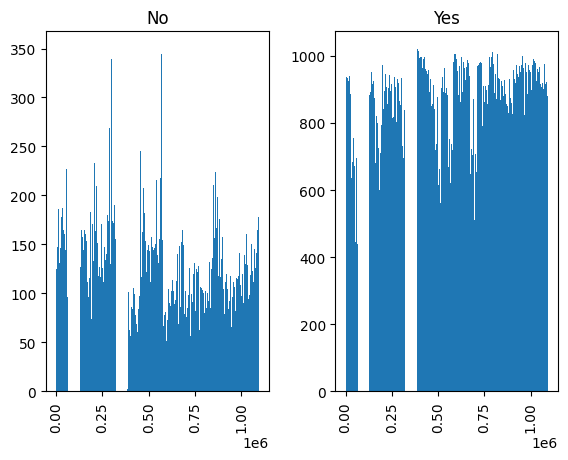

In [257]:

colts_data.hist(column = 'index', by = 'isAttended', bins = 1000)

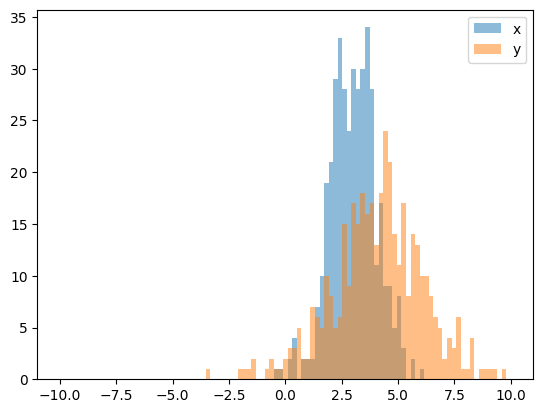

In [258]:
import random
import numpy
from matplotlib import pyplot

x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = numpy.linspace(-10, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

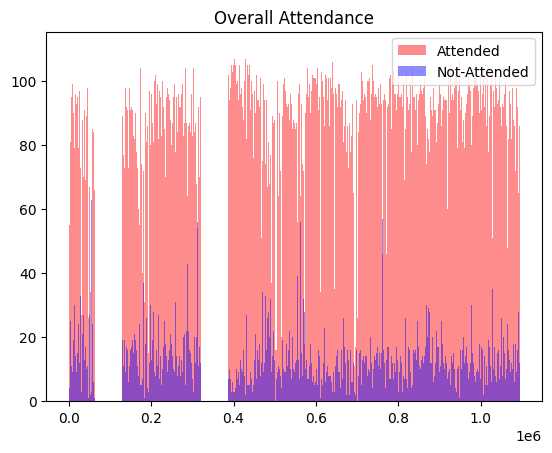

In [270]:
#filter the data 
from matplotlib.ticker import ScalarFormatter
x1 = colts_data.loc[colts_data.isAttended == 'Yes']
x2 = colts_data.loc[colts_data.isAttended=='No']
plt.hist(x1['index'], alpha=0.45, color='red', bins=10000)
plt.hist(x2['index'], alpha=0.45, color ='blue', bins=10000)
plt.title("Overall Attendance")
plt.legend(['Attended', 'Not-Attended'], loc='upper right')

x_formatter = ScalarFormatter(useOffset=False)
plt.gca().xaxis.set_major_formatter(x_formatter)
